# TELECOM CHURN CASE STUDY
### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Steps to build the model:

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

#### Importing the necessary libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Reading the Data 
telecom_churn=pd.read_csv("D:/PGDMLAI-March-2019/ML&AI/Telecom Churn Case Study/Telecom churn Dataset/telecom_churn_data.csv")

#### Understanding  the Structure of Data.

In [3]:
#setting maximum number of rows that can be displayed.
pd.set_option('display.max_columns',250)
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#checking the shape of the dataframe
telecom_churn.shape

(99999, 226)

In [5]:
telecom_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Preperation Steps

#### Checking for missing Value and Imputing them

In [6]:
#Checking for missing values.
pd.set_option('display.max_rows',250)
round(100*(telecom_churn.isnull().sum()/len(telecom_churn.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [7]:
#Taking backup of Original Dataset
telecom_churn_bkp=telecom_churn

In [8]:
telecom_churn_bkp.head()
telecom_churn_bkp.shape

(99999, 226)

#### Dropping unecessary columns(i.e Columns having either 0 or blank values in them)

In [9]:
telecom_churn.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis=1,inplace=True)

In [10]:
#Checking shape after Drop
telecom_churn.shape

(99999, 215)

In [11]:
#Creating a Dataframe for 0% Null Value 
telecom_churn_0_null_value=telecom_churn[['mobile_number',
'circle_id',
'last_date_of_month_6',
'arpu_6',
'arpu_7',
'arpu_8',
'arpu_9',
'total_og_mou_6',
'total_og_mou_7',
'total_og_mou_8',
'total_og_mou_9',
'total_ic_mou_6',
'total_ic_mou_7',
'total_ic_mou_8',
'total_ic_mou_9',
'total_rech_num_6',
'total_rech_num_7',
'total_rech_num_8',
'total_rech_num_9',
'total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8',
'total_rech_amt_9',
'max_rech_amt_6',
'max_rech_amt_7',
'max_rech_amt_8',
'max_rech_amt_9',
'last_day_rch_amt_6',
'last_day_rch_amt_7',
'last_day_rch_amt_8',
'last_day_rch_amt_9',
'vol_2g_mb_6',
'vol_2g_mb_7',
'vol_2g_mb_8',
'vol_2g_mb_9',
'vol_3g_mb_6',
'vol_3g_mb_7',
'vol_3g_mb_8',
'vol_3g_mb_9',
'monthly_2g_6',
'monthly_2g_7',
'monthly_2g_8',
'monthly_2g_9',
'sachet_2g_6',
'sachet_2g_7',
'sachet_2g_8',
'sachet_2g_9',
'monthly_3g_6',
'monthly_3g_7',
'monthly_3g_8',
'monthly_3g_9',
'sachet_3g_6',
'sachet_3g_7',
'sachet_3g_8',
'sachet_3g_9',
'aon',
'aug_vbc_3g',
'jul_vbc_3g',
'jun_vbc_3g',
'sep_vbc_3g']]

In [12]:
# Let's see the head of our DataFrame of 0% null value
telecom_churn_0_null_value.head()

,mobile_number,circle_id,last_date_of_month_6,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,6/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,6/30/2014,34.047,355.074,268.321,86.285,40.31,178.53,312.44,72.11,26.83,104.23,423.28,188.04,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,6/30/2014,167.690,189.058,210.226,290.714,155.33,412.94,285.46,124.94,370.04,519.53,395.03,517.74,5,4,2,7,168,315,116,358,86,200,86,100,0,200,86,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,6/30/2014,221.338,251.102,508.054,389.500,223.23,135.31,352.21,362.54,280.08,216.61,53.13,305.38,10,11,18,14,230,310,601,410,60,50,50,50,30,50,50,30,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,6/30/2014,261.636,309.876,238.174,163.426,127.28,241.33,208.16,104.59,216.44,198.29,338.81,205.31,5,6,3,4,196,350,287,200,56,110,110,50,50,110,110,50,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [13]:
#Creating a Dataframe for less than 10% Data.

telecom_churn_less_than_10=telecom_churn[['last_date_of_month_7',
'last_date_of_month_8',
'last_date_of_month_9',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9',
'onnet_mou_6',
'onnet_mou_7',
'onnet_mou_8',
'onnet_mou_9',
'offnet_mou_6',
'offnet_mou_7',
'offnet_mou_8',
'offnet_mou_9',
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',
'roam_ic_mou_9',
'roam_og_mou_6',
'roam_og_mou_7',
'roam_og_mou_8',
'roam_og_mou_9',
'loc_og_t2t_mou_6',
'loc_og_t2t_mou_7',
'loc_og_t2t_mou_8',
'loc_og_t2t_mou_9',
'loc_og_t2m_mou_6',
'loc_og_t2m_mou_7',
'loc_og_t2m_mou_8',
'loc_og_t2m_mou_9',
'loc_og_t2f_mou_6',
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',
'loc_og_t2f_mou_9',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
'loc_og_t2c_mou_9',
'loc_og_mou_6',
'loc_og_mou_7',
'loc_og_mou_8',
'loc_og_mou_9',
'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2t_mou_8',
'std_og_t2t_mou_9',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2m_mou_8',
'std_og_t2m_mou_9',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_t2f_mou_8',
'std_og_t2f_mou_9',
'std_og_mou_6',
'std_og_mou_7',
'std_og_mou_8',
'std_og_mou_9',
'isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'isd_og_mou_9',
'spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'spl_og_mou_9',
'og_others_6',
'og_others_7',
'og_others_8',
'og_others_9',
'loc_ic_t2t_mou_6',
'loc_ic_t2t_mou_7',
'loc_ic_t2t_mou_8',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7',
'loc_ic_t2m_mou_8',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_t2f_mou_9',
'loc_ic_mou_6',
'loc_ic_mou_7',
'loc_ic_mou_8',
'loc_ic_mou_9',
'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
'std_ic_t2f_mou_8',
'std_ic_t2f_mou_9',
'std_ic_mou_6',
'std_ic_mou_7',
'std_ic_mou_8',
'std_ic_mou_9',
'spl_ic_mou_6',
'spl_ic_mou_7',
'spl_ic_mou_8',
'spl_ic_mou_9',
'isd_ic_mou_6',
'isd_ic_mou_7',
'isd_ic_mou_8',
'isd_ic_mou_9',
'ic_others_6',
'ic_others_7',
'ic_others_8',
'ic_others_9',]]

In [14]:
#Getting the Head of Dataframe with less than 10% Null Value
telecom_churn_less_than_10.head(10)

,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
0,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN
1,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.0,0.00,0.00,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,47.64,108.68,120.94,18.04,0.0,0.00,0.00,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.00,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,0.21,0.00,0.00,0.45,0.00,0.85,0.00,0.01,0.93,3.14,0.00,0.36
3,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.00,29.23,16.63,2

In [15]:
#Checking for Null Values
pd.set_option('display.max_rows',250)
round(100*(telecom_churn_less_than_10.isnull().sum()/len(telecom_churn_less_than_10.index)),2)

last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
date_of_last_rech_6     1.61
date_of_last_rech_7     1.77
date_of_last_rech_8     3.62
date_of_last_rech_9     4.76
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou_9        7.75
loc_og_t2f_mou_6        3.94
loc_og_t2f_mou_7        3.86
loc_og_t2f_mou_8        5.38
loc_og_t2f_mou

In [16]:
#Converting Date into Year,Month,Date and then adding in DataFrame "telecom_churn_less_than_10"
telecom_churn_less_than_10['last_date_of_month_7'] = pd.to_datetime(telecom_churn_less_than_10['last_date_of_month_7'])
telecom_churn_less_than_10['last_date_of_month_8'] = pd.to_datetime(telecom_churn_less_than_10['last_date_of_month_8'])
telecom_churn_less_than_10['last_date_of_month_9'] = pd.to_datetime(telecom_churn_less_than_10['last_date_of_month_9'])

telecom_churn_less_than_10['date_of_last_rech_6']  = pd.to_datetime(telecom_churn_less_than_10['date_of_last_rech_6'])
telecom_churn_less_than_10['date_of_last_rech_7']  = pd.to_datetime(telecom_churn_less_than_10['date_of_last_rech_7'])
telecom_churn_less_than_10['date_of_last_rech_8']  = pd.to_datetime(telecom_churn_less_than_10['date_of_last_rech_8'])
telecom_churn_less_than_10['date_of_last_rech_9']  = pd.to_datetime(telecom_churn_less_than_10['date_of_last_rech_9'])

C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [17]:
telecom_churn_less_than_10['year_last_date_of_month_7'] = telecom_churn_less_than_10['last_date_of_month_7'].dt.year
telecom_churn_less_than_10['month_last_date_of_month_7'] = telecom_churn_less_than_10['last_date_of_month_7'].dt.month
telecom_churn_less_than_10['day_last_date_of_month_7'] = telecom_churn_less_than_10['last_date_of_month_7'].dt.day

telecom_churn_less_than_10['year_last_date_of_month_8'] = telecom_churn_less_than_10['last_date_of_month_8'].dt.year
telecom_churn_less_than_10['month_last_date_of_month_8'] =telecom_churn_less_than_10['last_date_of_month_8'].dt.month
telecom_churn_less_than_10['day_last_date_of_month_8'] = telecom_churn_less_than_10['last_date_of_month_8'].dt.day

telecom_churn_less_than_10['year_last_date_of_month_9'] = telecom_churn_less_than_10['last_date_of_month_9'].dt.year
telecom_churn_less_than_10['month_last_date_of_month_9'] = telecom_churn_less_than_10['last_date_of_month_9'].dt.month
telecom_churn_less_than_10['day_last_date_of_month_9'] =   telecom_churn_less_than_10['last_date_of_month_9'].dt.day

telecom_churn_less_than_10['year_date_of_last_rech_6'] = telecom_churn_less_than_10['date_of_last_rech_6'].dt.year
telecom_churn_less_than_10['month_date_of_last_rech_6'] = telecom_churn_less_than_10['date_of_last_rech_6'].dt.month
telecom_churn_less_than_10['day_date_of_last_rech_6'] = telecom_churn_less_than_10['date_of_last_rech_6'].dt.day

telecom_churn_less_than_10['year_date_of_last_rech_7'] = telecom_churn_less_than_10['date_of_last_rech_7'].dt.year
telecom_churn_less_than_10['month_date_of_last_rech_7'] = telecom_churn_less_than_10['date_of_last_rech_7'].dt.month
telecom_churn_less_than_10['day_date_of_last_rech_7'] = telecom_churn_less_than_10['date_of_last_rech_7'].dt.day

telecom_churn_less_than_10['year_date_of_last_rech_8'] = telecom_churn_less_than_10['date_of_last_rech_8'].dt.year
telecom_churn_less_than_10['month_date_of_last_rech_8'] = telecom_churn_less_than_10['date_of_last_rech_8'].dt.month
telecom_churn_less_than_10['day_date_of_last_rech_8'] = telecom_churn_less_than_10['date_of_last_rech_8'].dt.day


telecom_churn_less_than_10['year_date_of_last_rech_9'] = telecom_churn_less_than_10['date_of_last_rech_9'].dt.year
telecom_churn_less_than_10['month_date_of_last_rech_9'] = telecom_churn_less_than_10['date_of_last_rech_9'].dt.month
telecom_churn_less_than_10['day_date_of_last_rech_9'] = telecom_churn_less_than_10['date_of_last_rech_9'].dt.day


C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [18]:
telecom_churn_less_than_10.head()

,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,year_last_date_of_month_7,month_last_date_of_month_7,day_last_date_of_month_7,year_last_date_of_month_8,month_last_date_of_month_8,day_last_date_of_month_8,year_last_date_of_month_9,month_last_date_of_month_9,day_last_date_of_month_9,year_date_of_last_rech_6,month_date_of_last_rech_6,day_date_of_last_rech_6,year_date_of_last_rech_7,month_date_of_last_rech_7,day_date_of_last_rech_7,year_date_of_last_rech_8,month_date_of_last_rech_8,day_date_of_last_rech_8,year_date_of_last_rech_9,month_date_of_last_rech_9,day_date_of_last_rech_9
0,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,2014.0,7.0,31.0,2014.0,8.0,31.0,2014.0,9.0,30.0,2014.0,6.0,21.0,2014.0,7.0,16.0,2014.0,8.0,8.0,2014.0,9.0,28.0
1,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,2014.0,7.0,31.0,2014.0,8.0,31.0,2014.0,9.0,30.0,2014.0,6.0,29.0,2014.0,7.0,31.0,2014.0,8.0,28.0,2014.0,9.0,30.0
2,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,

In [19]:
# Now Deleting the original Dates columnn.
telecom_churn_less_than_10.drop(['last_date_of_month_7',
'last_date_of_month_8',
'last_date_of_month_9',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9'],axis=1,inplace=True)

C:\Users\Varun\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
#getting the head() after Deleting
telecom_churn_less_than_10.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,year_last_date_of_month_7,month_last_date_of_month_7,day_last_date_of_month_7,year_last_date_of_month_8,month_last_date_of_month_8,day_last_date_of_month_8,year_last_date_of_month_9,month_last_date_of_month_9,day_last_date_of_month_9,year_date_of_last_rech_6,month_date_of_last_rech_6,day_date_of_last_rech_6,year_date_of_last_rech_7,month_date_of_last_rech_7,day_date_of_last_rech_7,year_date_of_last_rech_8,month_date_of_last_rech_8,day_date_of_last_rech_8,year_date_of_last_rech_9,month_date_of_last_rech_9,day_date_of_last_rech_9
0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,2014.0,7.0,31.0,2014.0,8.0,31.0,2014.0,9.0,30.0,2014.0,6.0,21.0,2014.0,7.0,16.0,2014.0,8.0,8.0,2014.0,9.0,28.0
1,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,2014.0,7.0,31.0,2014.0,8.0,31.0,2014.0,9.0,30.0,2014.0,6.0,29.0,2014.0,7.0,31.0,2014.0,8.0,28.0,2014.0,9.0,30.0
2,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.9

#### Imuting columns having null value less than 10 % applying Imputer

In [21]:
from sklearn.preprocessing import Imputer

colsnumeric= telecom_churn_less_than_10.columns

imp_mean = Imputer(missing_values=np.nan, strategy='mean', axis=0)

imp_mean = imp_mean.fit(telecom_churn_less_than_10)

imputed_df = imp_mean.transform(telecom_churn_less_than_10.values)


C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
#Getting the Head of Dataframe with less than 10% Null Value after Imputation.
pd.set_option('display.max_rows',250)
df=pd.DataFrame(imputed_df,columns=telecom_churn_less_than_10.columns)
df.head(10)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,year_last_date_of_month_7,month_last_date_of_month_7,day_last_date_of_month_7,year_last_date_of_month_8,month_last_date_of_month_8,day_last_date_of_month_8,year_last_date_of_month_9,month_last_date_of_month_9,day_last_date_of_month_9,year_date_of_last_rech_6,month_date_of_last_rech_6,day_date_of_last_rech_6,year_date_of_last_rech_7,month_date_of_last_rech_7,day_date_of_last_rech_7,year_date_of_last_rech_8,month_date_of_last_rech_8,day_date_of_last_rech_8,year_date_of_last_rech_9,month_date_of_last_rech_9,day_date_of_last_rech_9
0,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.00,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,32.457179,33.887833,0.00,31.229344,0.061557,0.033585,0.00,0.163137,7.460608,8.334936,0.00,8.063003,0.854656,1.01296,0.00,1.017162,2014.0,7.0,31.0,2014.0,8.0,31.0,2014.0,9.0,30.0,2014.0,6.0,21.0,2014.0,7.0,16.0,2014.0,8.0,8.0,2014.0,9.0,28.0
1,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.56000,7.68,18.340000,11.510000,75.940000,291.86,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,2.9100,0.00,0.000000,35.390000,150.510000,299.54,72.11000,0.23000,4.110000,0.00,0.000000,0.000000,0.460000,0.13,0.000000,0.000000,0.00000,0.00,0.000000,0.230000,4.580000,0.13,0.000000,0.000000,0.000000,0.00,0.000000,4.680000,23.430000,12.76,0.000000,0.000000,0.000000,0.0,0.000000,1.610000,29.91000,29.23,116.090000,17.48000,65.380000,375.58,56.930000,0.000000,8.930000,3.61,0.000000,19.090000,104.23000,408.43,173.030000,0.000000,0.000000,2.35,0.000000,5.90000,0.000000,12.49,15.010000,0.000000,0.000000,0.00,0.000000,5.900000,0.000000,14.84,15.010000,0.000000,0.000000,0.00,0.00

#### Imputing Features with null value greater than 70%

In [23]:
#Creating a Datframe containing all the Features with Null Value greater than 70%
telecom_churn_more_than_70=telecom_churn[['date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9',
'total_rech_data_6',
'total_rech_data_7',
'total_rech_data_8',
'total_rech_data_9',
'max_rech_data_6',
'max_rech_data_7',
'max_rech_data_8',
'max_rech_data_9',
'count_rech_2g_6',
'count_rech_2g_7',
'count_rech_2g_8',
'count_rech_2g_9',
'count_rech_3g_6',
'count_rech_3g_7',
'count_rech_3g_8',
'count_rech_3g_9',
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'av_rech_amt_data_8',
'av_rech_amt_data_9',
'arpu_3g_6',
'arpu_3g_7',
'arpu_3g_8',
'arpu_3g_9',
'arpu_2g_6',
'arpu_2g_7',
'arpu_2g_8',
'arpu_2g_9',
'night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8',
'night_pck_user_9',
'fb_user_6',
'fb_user_7',
'fb_user_8',
'fb_user_9']]

In [24]:
#Getting the head of Data Frame with more than 70% null value
telecom_churn_more_than_70.head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [25]:
#As of now we will be imputing Data with more than 70% null value with 0
telecom_churn_more_than_70=telecom_churn_more_than_70.fillna(0)
telecom_churn_more_than_70.head()

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,6/21/2014,7/16/2014,8/8/2014,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0,7/25/2014,8/10/2014,0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,50.0,0.0,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0,0,9/17/2014,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6/4/2014,0,0,0,1.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#Creating a Master DataFrame containing less than 10%,more than 70% and 0% Null after Imputation.
telecom_churn_final_df=pd.concat([telecom_churn_0_null_value,df,telecom_churn_more_than_70],axis = 1)

telecom_churn_final_df.head()

,mobile_number,circle_id,last_date_of_month_6,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,year_last_date_of_month_7,month_last_date_of_month_7,day_last_date_of_month_7,year_last_date_of_month_8,month_last_date_of_month_8,day_last_date_of_month_8,year_last_date_of_month_9,month_last_date_of_month_9,day_last_date_of_month_9,year_date_of_last_rech_6,month_date_of_last_rech_6,day_date_of_last_rech_6,year_date_of_last_rech_7,month_date_of_last_rech_7,day_date_of_last_rech_7,year_date_of_last_rech_8,month_date_of_last_rech_8,day_date_of_last_rech_8,year_date_of_last_rech_9,month_date_of_last_rech_9,day_date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,7000842753,109,6/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.58

In [46]:
telecom_churn_final_df.shape

(99999, 229)

In [47]:
#Converting Date Column to year,month and day.
telecom_churn_final_df['last_date_of_month_6']=pd.to_datetime(telecom_churn_final_df['last_date_of_month_6'])
telecom_churn_final_df['date_of_last_rech_data_6']=pd.to_datetime(telecom_churn_final_df['date_of_last_rech_data_6'])
telecom_churn_final_df['date_of_last_rech_data_7']=pd.to_datetime(telecom_churn_final_df['date_of_last_rech_data_7'])
telecom_churn_final_df['date_of_last_rech_data_8']=pd.to_datetime(telecom_churn_final_df['date_of_last_rech_data_8'])
telecom_churn_final_df['date_of_last_rech_data_9']=pd.to_datetime(telecom_churn_final_df['date_of_last_rech_data_9'])

telecom_churn_final_df['year_last_date_of_month_6'] = telecom_churn_final_df['last_date_of_month_6'].dt.year
telecom_churn_final_df['month_last_date_of_month_6'] = telecom_churn_final_df['last_date_of_month_6'].dt.month
telecom_churn_final_df['day_last_date_of_month_6'] = telecom_churn_final_df['last_date_of_month_6'].dt.day


telecom_churn_final_df['year_date_of_last_rech_data_6'] = telecom_churn_final_df['date_of_last_rech_data_6'].dt.year
telecom_churn_final_df['month_date_of_last_rech_data_6'] = telecom_churn_final_df['date_of_last_rech_data_6'].dt.month
telecom_churn_final_df['day_date_of_last_rech_data_6'] = telecom_churn_final_df['date_of_last_rech_data_6'].dt.day

telecom_churn_final_df['year_date_of_last_rech_data_7'] = telecom_churn_final_df['date_of_last_rech_data_7'].dt.year
telecom_churn_final_df['month_date_of_last_rech_data_7'] = telecom_churn_final_df['date_of_last_rech_data_7'].dt.month
telecom_churn_final_df['day_date_of_last_rech_data_7'] = telecom_churn_final_df['date_of_last_rech_data_7'].dt.day

telecom_churn_final_df['year_date_of_last_rech_data_8'] = telecom_churn_final_df['date_of_last_rech_data_8'].dt.year
telecom_churn_final_df['month_date_of_last_rech_data_8'] = telecom_churn_final_df['date_of_last_rech_data_8'].dt.month
telecom_churn_final_df['day_date_of_last_rech_data_8'] = telecom_churn_final_df['date_of_last_rech_data_8'].dt.day

telecom_churn_final_df['year_date_of_last_rech_data_9'] = telecom_churn_final_df['date_of_last_rech_data_9'].dt.year
telecom_churn_final_df['month_date_of_last_rech_data_9'] = telecom_churn_final_df['date_of_last_rech_data_9'].dt.month
telecom_churn_final_df['day_date_of_last_rech_data_9'] = telecom_churn_final_df['date_of_last_rech_data_9'].dt.day

In [48]:
#Dropping initial Columns of Date.
telecom_churn_final_df.drop(['last_date_of_month_6',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9'],axis=1,inplace=True)

#### Checking for Missing Value again after Imputing

In [49]:
#Checking for missing values.
pd.set_option('display.max_rows',250)
round(100*(telecom_churn_final_df.isnull().sum()/len(telecom_churn_final_df.index)),2)

mobile_number                     0.0
circle_id                         0.0
arpu_6                            0.0
arpu_7                            0.0
arpu_8                            0.0
arpu_9                            0.0
total_og_mou_6                    0.0
total_og_mou_7                    0.0
total_og_mou_8                    0.0
total_og_mou_9                    0.0
total_ic_mou_6                    0.0
total_ic_mou_7                    0.0
total_ic_mou_8                    0.0
total_ic_mou_9                    0.0
total_rech_num_6                  0.0
total_rech_num_7                  0.0
total_rech_num_8                  0.0
total_rech_num_9                  0.0
total_rech_amt_6                  0.0
total_rech_amt_7                  0.0
total_rech_amt_8                  0.0
total_rech_amt_9                  0.0
max_rech_amt_6                    0.0
max_rech_amt_7                    0.0
max_rech_amt_8                    0.0
max_rech_amt_9                    0.0
last_day_rch

#### Need to find the outlier by calculating the IQR.

In [50]:
#sorted(telecom_churn_final_df)

telecom_churn_final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 239 entries, mobile_number to day_date_of_last_rech_data_9
dtypes: float64(189), int64(50)
memory usage: 182.3 MB


In [51]:
#Finding Q1 and Q3 values
Q1=telecom_churn_final_df.quantile(0.25)
Q3=telecom_churn_final_df.quantile(0.75)
IQR=Q3-Q1

In [52]:
#Finding Outlier Columns
outliers_test =  (((telecom_churn_final_df >= (Q1 - 1.5 * IQR)) & (telecom_churn_final_df <= (Q3 + 1.5 * IQR))).all(axis=0))

In [53]:
outliers_test

mobile_number                      True
circle_id                          True
arpu_6                            False
arpu_7                            False
arpu_8                            False
arpu_9                            False
total_og_mou_6                    False
total_og_mou_7                    False
total_og_mou_8                    False
total_og_mou_9                    False
total_ic_mou_6                    False
total_ic_mou_7                    False
total_ic_mou_8                    False
total_ic_mou_9                    False
total_rech_num_6                  False
total_rech_num_7                  False
total_rech_num_8                  False
total_rech_num_9                  False
total_rech_amt_6                  False
total_rech_amt_7                  False
total_rech_amt_8                  False
total_rech_amt_9                  False
max_rech_amt_6                    False
max_rech_amt_7                    False
max_rech_amt_8                    False


In [54]:
#Dropping coulmns that are having outliers.

telecom_churn_final_df.drop(['circle_id','day_last_date_of_month_6','day_last_date_of_month_7',
                                    'day_last_date_of_month_8','day_last_date_of_month_9','mobile_number',
                                    'month_date_of_last_rech_6','month_date_of_last_rech_7','month_date_of_last_rech_8',
                                    'month_date_of_last_rech_9','month_date_of_last_rech_data_6',
                                    'month_date_of_last_rech_data_7','month_date_of_last_rech_data_8',
                                    'month_last_date_of_month_6','month_last_date_of_month_7',
                                    'month_last_date_of_month_8','month_last_date_of_month_9',
                                    'year_date_of_last_rech_6','year_date_of_last_rech_7',
                                    'year_date_of_last_rech_8','year_date_of_last_rech_9',
                                    'year_date_of_last_rech_data_6','year_date_of_last_rech_data_7',
                                    'year_date_of_last_rech_data_8','year_last_date_of_month_6',
                                    'year_last_date_of_month_7','year_last_date_of_month_8',
                                    'year_last_date_of_month_9','year_date_of_last_rech_data_9',
                                    'month_date_of_last_rech_data_9'],axis=1,inplace=True)


## Deriving New Features

#### Deriving a new Feature based on the Average recharge amount of Good Phase

In [55]:
telecom_churn_final_df['total_recharge_amt_data_6_7']=((telecom_churn_final_df['total_rech_data_6'].fillna(0)*telecom_churn_final_df['av_rech_amt_data_6'].fillna(0))+(telecom_churn_final_df['total_rech_data_7'].fillna(0)*telecom_churn_final_df['av_rech_amt_data_7'].fillna(0)))
telecom_churn_final_df['total_rech_amt_non_data_6_7']=telecom_churn_final_df['total_rech_amt_6'].fillna(0)+telecom_churn_final_df['total_rech_amt_7'].fillna(0)

telecom_churn_final_df['total_avg_rchg_6_7']=(telecom_churn_final_df['total_recharge_amt_data_6_7']+telecom_churn_final_df['total_rech_amt_non_data_6_7'])/2


## Filtering high-value customers

#### Filtering high-value customers based on their average recharge amount of Good Phase.

In [56]:
#Calculatin 70% Quartile of Average 6 and 7 months amount
telecom_churn_final_df.quantile([.70], axis = 0) 

,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,day_date_of_last_rech_6,day_date_of_last_rech_7,day_date_of_last_rech_8,day_date_of_last_rech_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,day_date_of_last_rech_data_6,day_date_of_last_rech_data_7,day_date_of_last_rech_data_8,day_date_of_last_rech_data_9,total_recharge_amt_data_6_7,total_rech_amt_non_data_6_7,total_avg_rchg_6_7
0.7,324.8394,317.9104,322.1346,305.9684,304.752,306.814,300.922,285.29,213.186,213.172,210.986,200.18,8.0,8.0,8.0,8.0,378.0,370.0,380.0,355.0,110.0,120.0,130.0,130.0,110.0,65.0,61.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1510.0,0.0,0.0,0.0,0.0,106.04,102.21,109.29,117.652,197.935577,197.045133,196.574803,190.337222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.69,35.71,38.13,40.98,93.342088,91.397131,91.755128,90.463192,1.66,1.68,1.84,2.11,0.0,0.0,0.0,0.0,144.201175,141.670476,141.328209,138.70997,23.23,23.402,26.49,31.84,44.04,44.31,47.59,52.81,0.0,0.0,0.0,0.0,120.13,123.16,134.786,153.836,0.0,0.0,0.0,0.0,1.93,3.01,3.66,3.49,0.0,0.0,0.0,0.0,42.54,41.51,44.21,46.281794,107.47565,107.120493,108.460515,106.155471,6.91,6.96,7.49,8.69,168.572,167.731816,1

In [57]:
#Getting the shape of DataFrame
telecom_churn_final_df_temp=(telecom_churn_final_df[telecom_churn_final_df['total_avg_rchg_6_7']>=478])

#### Final Dataset  with High Value Customers.

In [58]:
telecom_churn_final_df_temp.head()

,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,day_date_of_last_rech_6,day_date_of_last_rech_7,day_date_of_last_rech_8,day_date_of_last_rech_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,day_date_of_last_rech_data_6,day_date_of_last_rech_data_7,day_date_of_last_rech_data_8,day_date_of_last_rech_data_9,total_recharge_amt_data_6_7,total_rech_amt_non_data_6_7,total_avg_rchg_6_7
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.00,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,47.922365,47.99052,0.16,46.281794,107.4756

## Tag churners and remove attributes of the churn phase

#### Defined a Function which determines the value of churn based on the features  such as total_ic_mou_9, total_og_mou_9,vol_2g_mb_9, vol_3g_mb_9

In [59]:
def churn_value(*args):
    for x in args:
        filter_list= list(map(lambda x:0 if x>0 else 1,args))
        y=pd.Series(filter_list)
        return y

In [60]:
pd.set_option('display.max_rows',20)
telecom_churn_final_df_temp['churn_columns']=telecom_churn_final_df_temp['total_ic_mou_9']+telecom_churn_final_df_temp['total_og_mou_9']+telecom_churn_final_df_temp['vol_2g_mb_9']+telecom_churn_final_df_temp['vol_3g_mb_9']
telecom_churn_final_df_temp['churn']=telecom_churn_final_df_temp['churn_columns'].apply(churn_value)
telecom_churn_final_df_temp.head()

C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,day_date_of_last_rech_6,day_date_of_last_rech_7,day_date_of_last_rech_8,day_date_of_last_rech_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,day_date_of_last_rech_data_6,day_date_of_last_rech_data_7,day_date_of_last_rech_data_8,day_date_of_last_rech_data_9,total_recharge_amt_data_6_7,total_rech_amt_non_data_6_7,total_avg_rchg_6_7,churn_columns,churn
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.00,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,47.922365,47.99052,0.1

In [61]:
## taking a backup before Drop

telecom_churn_final_df_temp_bkp=telecom_churn_final_df_temp

#telecom_churn.to_csv("D:/PGDMLAI-March-2019/ML&AI/Telecom Churn Case Study/telecom_churn_before_drop.csv",sep=',', encoding='utf-8')


#### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [63]:
#Removing attributes corresponding to churn
telecom_churn_final_df_temp.drop(['onnet_mou_9',
'offnet_mou_9',
'roam_ic_mou_9',
'roam_og_mou_9',
'loc_og_t2t_mou_9',
'loc_og_t2m_mou_9',
'loc_og_t2f_mou_9',
'loc_og_t2c_mou_9',
'loc_og_mou_9',
'std_og_t2t_mou_9',
'std_og_t2m_mou_9',
'std_og_t2f_mou_9',
'std_og_mou_9',
'isd_og_mou_9',
'spl_og_mou_9',
'og_others_9',
'total_og_mou_9',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_9',
'loc_ic_mou_9',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_9',
'std_ic_mou_9',
'total_ic_mou_9',
'spl_ic_mou_9',
'isd_ic_mou_9',
'ic_others_9',
'total_rech_num_9',
'total_rech_amt_9',
'max_rech_amt_9',
'last_day_rch_amt_9',
'total_rech_data_9',
'max_rech_data_9',
'count_rech_3g_9',
'av_rech_amt_data_9',
'arpu_3g_9',
'arpu_2g_9',
'night_pck_user_9',
'sachet_2g_9',
'monthly_3g_9',
'sachet_3g_9',
'fb_user_9',
'total_ic_mou_9',
'total_og_mou_9',
'vol_2g_mb_9',
'vol_3g_mb_9',
'arpu_9',
'count_rech_2g_9',
'monthly_2g_9'                 
],axis=1,inplace=True)

#telecom_churn_final_df.shape

C:\Users\Varun\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
#Final Features after drop
telecom_churn_final_df_temp.shape

(30001, 165)

In [65]:
#Finding out the churn rate in the given Dataset.

churn =(sum(telecom_churn_final_df_temp['churn'])/len(telecom_churn_final_df_temp['churn']))*100
churn

8.136395453484884

#### So we have almost 8.13 % churn rate

In [66]:
#Segregating the Dependent and Independent Variable.

from sklearn.model_selection import train_test_split

# Putting feature variable to X 
X = telecom_churn_final_df_temp.drop(['churn'],axis=1)  
# Putting response variable to y 
y = telecom_churn_final_df_temp['churn']  
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Importing re-sample
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
clf_2 = LogisticRegression().fit(X, y)

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [70]:
y_pred = clf_2.predict(X)

In [71]:
print( accuracy_score(y, y_pred))

0.9928002399920003


In [72]:
print(confusion_matrix(y, y_pred))

[[27349   211]
 [    5  2436]]


### Correcting Class Imbalance

In [73]:
#Create independent and Dependent Features
columns = telecom_churn_final_df_temp.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["churn"]]
# Store the variable we are predicting 
target = "churn"
# Define a random state 
state = np.random.RandomState(42)
X = telecom_churn_final_df_temp[columns]
Y = telecom_churn_final_df_temp[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(30001, 164)
(30001,)


In [74]:
telecom_churn_final_df_temp.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

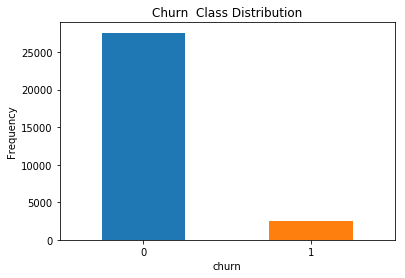

In [75]:
count_classes = pd.value_counts(telecom_churn_final_df_temp['churn'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Churn  Class Distribution")

#plt.xticks(range(2), LABELS)

plt.xlabel("churn")

plt.ylabel("Frequency")

In [76]:
# Getting the Churn and Non-Churn Dataset.

churn = telecom_churn_final_df_temp[telecom_churn_final_df_temp['churn']==1]

normal = telecom_churn_final_df_temp[telecom_churn_final_df_temp['churn']==0]

In [77]:
print(churn.shape,normal.shape)

(2441, 165) (27560, 165)


In [78]:
from imblearn.under_sampling import NearMiss

###  Implementing Undersampling for Handling Class Imbalanced 

In [79]:
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,Y)

In [80]:
#Retaining the column name in DF
X_res_df = pd.DataFrame(X_res, columns = X.columns)
#y_res_df = pd.DataFrame(y_res, columns = Y.columns)
#print(y_res_df)
#X_res_df.shape


In [81]:
X_res.shape,y_res.shape

((4882, 164), (4882,))

In [82]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 27560, 1: 2441})
Resampled dataset shape Counter({0: 2441, 1: 2441})


In [83]:
clf_1 = LogisticRegression().fit(X_res, y_res)

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [84]:
pred_y_1 = clf_1.predict(X_res)

In [85]:
print(accuracy_score(pred_y_1,y_res))

0.9930356411306841


In [86]:
print(confusion_matrix(pred_y_1,y_res))

[[2407    0]
 [  34 2441]]


In [87]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res_df, y_res, train_size=0.7,test_size=0.3,random_state=100)

#### Dimensionality reduction using PCA

In [88]:
X_train.shape

(3417, 164)

In [89]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [90]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [91]:
pca.components_

array([[-1.08857425e-01, -8.85656069e-02, -3.86343650e-02, ...,
        -2.36218850e-01,  2.27931844e-01,  1.03756695e-02],
       [ 1.45639218e-01,  1.53289091e-01,  6.25031386e-02, ...,
         3.55060717e-01,  4.27387150e-01, -2.75482541e-02],
       [ 1.48127989e-01,  2.03626740e-01,  1.32660326e-01, ...,
         4.49323081e-01,  1.18568656e-01, -1.73881266e-02],
       ...,
       [ 0.00000000e+00,  2.94902991e-17,  2.23858534e-17, ...,
         1.40191383e-04,  5.96947418e-05,  0.00000000e+00],
       [ 0.00000000e+00,  8.67361738e-19, -2.67101263e-16, ...,
         9.33180778e-05, -5.02602451e-04,  4.85722573e-17],
       [ 0.00000000e+00, -2.25514052e-17, -5.67111061e-17, ...,
        -3.58777313e-05,  1.33247705e-04, -1.73472348e-17]])

In [92]:
pca.explained_variance_ratio_

array([3.14641442e-01, 2.33639574e-01, 7.81370551e-02, 6.21041815e-02,
       5.57643215e-02, 4.20240125e-02, 3.76403063e-02, 2.43475755e-02,
       2.20792052e-02, 1.93212993e-02, 1.16975272e-02, 1.02053529e-02,
       8.87434417e-03, 8.07587193e-03, 7.08978778e-03, 6.15900431e-03,
       4.93173610e-03, 4.40490109e-03, 3.96407069e-03, 3.64792080e-03,
       3.59705670e-03, 3.18982938e-03, 3.10082968e-03, 2.83316081e-03,
       2.23308433e-03, 2.11774319e-03, 1.84935811e-03, 1.62523385e-03,
       1.57762231e-03, 1.50352956e-03, 1.41852202e-03, 1.18647136e-03,
       1.15325058e-03, 1.02987720e-03, 9.50622743e-04, 8.70962950e-04,
       8.37615729e-04, 7.11405196e-04, 6.45299816e-04, 6.37629575e-04,
       5.97060326e-04, 5.71276149e-04, 5.45078555e-04, 5.08293490e-04,
       4.93770520e-04, 4.74812031e-04, 4.68500316e-04, 4.38601607e-04,
       3.54834228e-04, 3.15129588e-04, 2.90323540e-04, 2.42406923e-04,
       2.39959133e-04, 2.31407559e-04, 2.19846698e-04, 2.11400119e-04,
      

In [93]:
# let's check the features with top PCA components
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
print(pcs_df.shape)
pcs_df.head()

(164, 3)


,PC1,PC2,Feature
0,-0.108857,0.145639,arpu_6
1,-0.088566,0.153289,arpu_7
2,-0.038634,0.062503,arpu_8
3,-0.256617,0.229473,total_og_mou_6
4,-0.222689,0.217325,total_og_mou_7


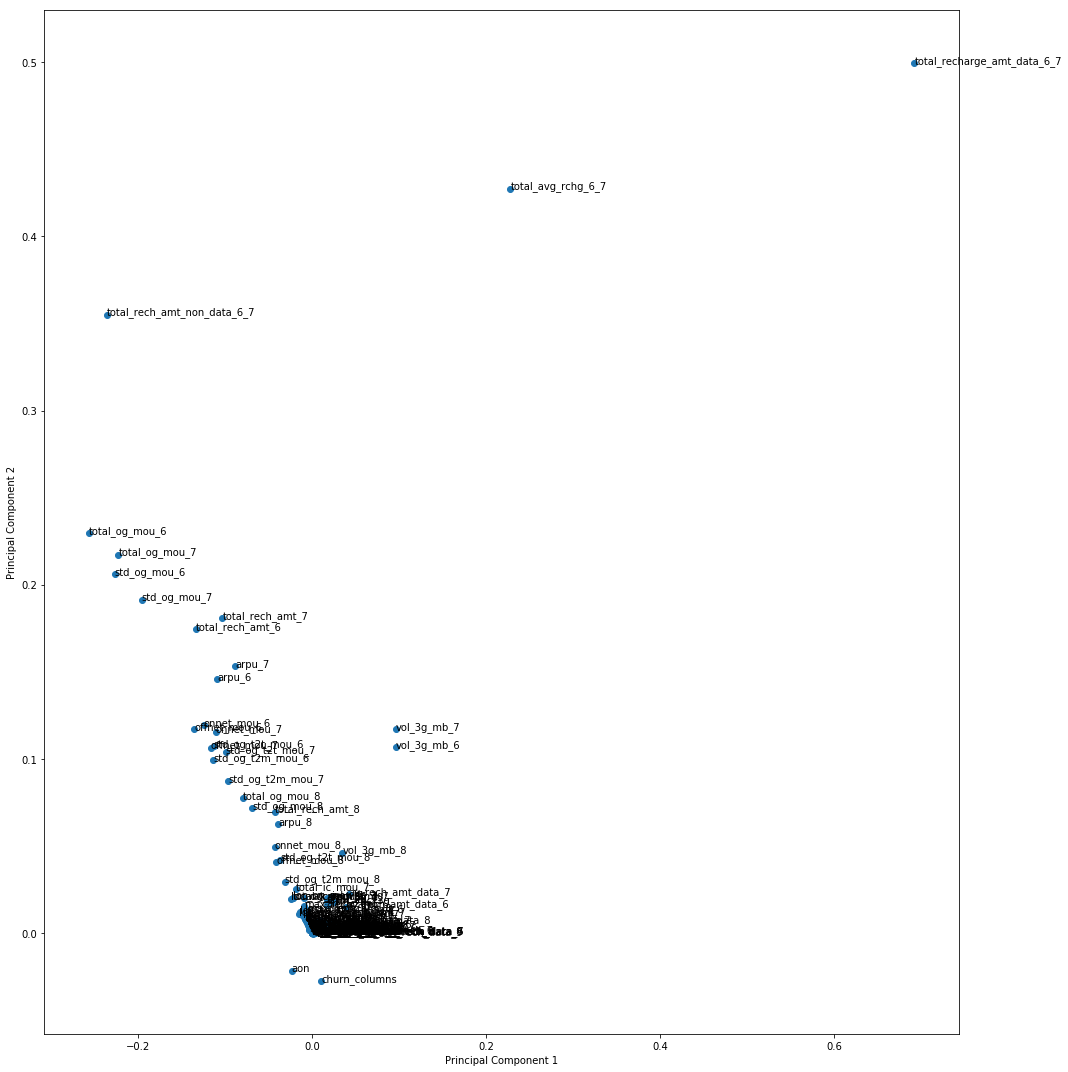

In [94]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

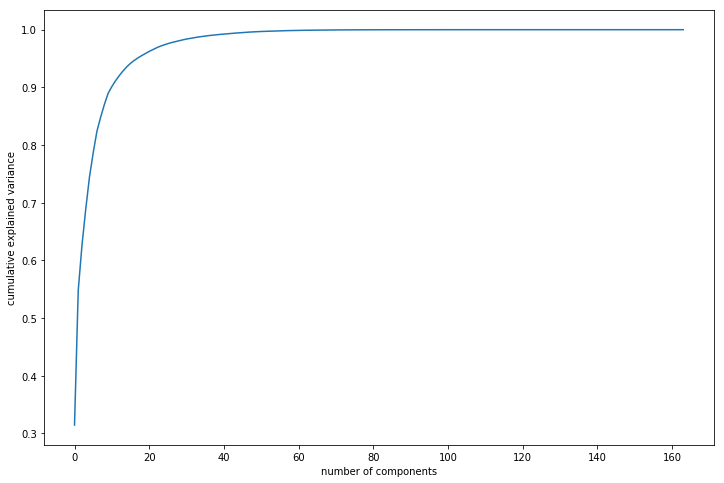

In [95]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Since in the above scree plot 20 complonent explains 95% of the Variance hence we select n_component as 20

In [96]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20,copy=True)

In [97]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(3417, 20)

In [98]:
df_train_pca

array([[-1.48214391e+03,  3.03776386e+02, -6.78735685e+02, ...,
        -9.71350425e+01,  1.27366860e+02,  2.34250905e+01],
       [ 2.30008337e+03, -2.30247692e+02, -5.00904922e+02, ...,
        -4.63879091e+01, -2.63586458e+01, -3.34050567e+01],
       [-1.06273017e+02, -1.11541540e+03,  5.74807469e+02, ...,
        -1.87499270e+02, -4.62937676e+02, -1.06794669e+02],
       ...,
       [-1.46088768e+03,  1.39711800e+02, -6.69886938e+02, ...,
         4.41589645e-01,  2.73460218e+01, -6.81783564e+01],
       [ 3.64316042e+03,  9.98346737e+02, -8.97799315e+02, ...,
        -3.50850471e+01,  2.73527209e+01,  8.29353866e+00],
       [-1.58798152e+03,  5.03628958e+02, -6.89247965e+02, ...,
        -1.72896943e+02,  2.91100448e+02,  1.50262404e+01]])

In [99]:
#Getting the inverse Transform of df_train_pca

df_1 = pca_final.inverse_transform(df_train_pca)
print(df_1)

[[ 548.90999878  469.53086597  525.3041298  ... 1221.73031479
   610.89877457  131.91186001]
 [ 121.77152874   96.10204609  122.33057013 ...  244.23812254
  1346.98824036  183.93583805]
 [ 333.96672785  470.03260061  611.17650436 ... 1051.71045116
   521.15762589  186.80255659]
 ...
 [ 734.46617126  291.39674891   54.60794149 ... 1153.71866652
   578.19519786  133.67998745]
 [ 137.36315705  118.32744109   33.57344596 ...  287.22088638
  2193.75449713  159.01948213]
 [ 951.3579038   332.33744206  237.55621222 ... 1490.61523597
   742.38317964   46.7783563 ]]


#### Creating correlation matrix for the principal components - we expect little to no correlation

In [100]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

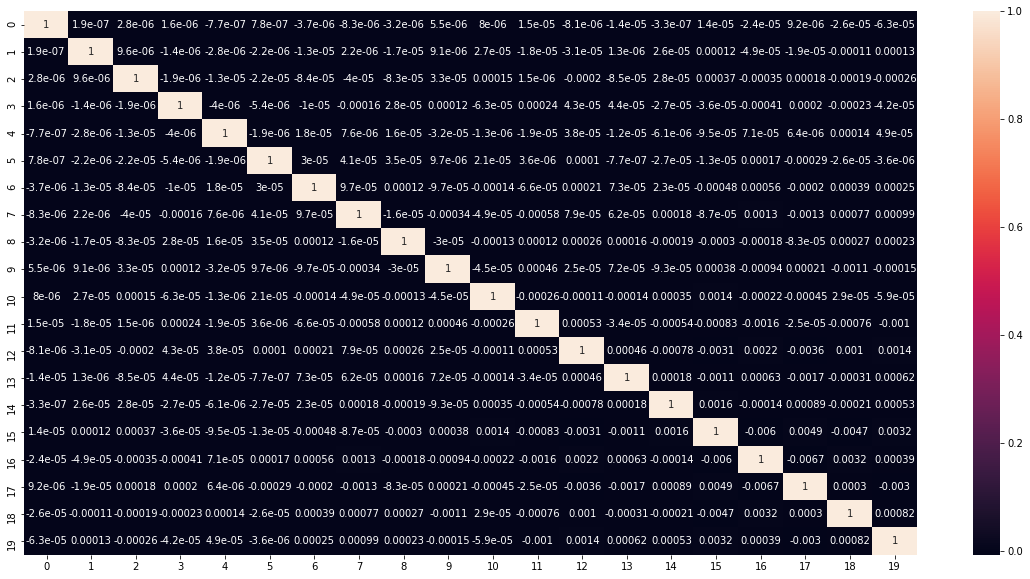

In [101]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [102]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.004870903473503985 , min corr:  -0.006655023526529244


In [103]:
#Applying selected components to the test data - 50 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1465, 20)

### Optimal Number of Features Obtained is 20 after PCA

In [104]:
def imp_metrix(y_test,y_pred):    
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    TP = cnf_matrix[1,1] # true positive 
    TN = cnf_matrix[0,0] # true negatives
    FP = cnf_matrix[0,1] # false positives
    FN = cnf_matrix[1,0] # false negatives
    sensitivity = TP/(FN+TP)
    specificity =  TN/(FP+TN)
    precision = TP/(FP+TP)
    fpr = FP/(TN+FP) # False Positive Rate
    ppv = TP/(TP+FP) # Positive predictive value
    npv = TN/(TN+FN) # Negative predictive value
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    print("Precision: ",precision)
    print("False Positive Rate: ", fpr)
    print("Positive predictive value: ",ppv)
    print("Negative predictive value: ",npv)
    print("AUC Score: ",metrics.roc_auc_score(y_test, y_pred))
    print("F1 Score: ",metrics.f1_score(y_test, y_pred))
    print("Accuracy Score: ",metrics.accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix")
    heatmap = sns.heatmap(cnf_matrix, annot=True, annot_kws={"size": 20}, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
    plt.ylabel('True', fontsize = 14)
    plt.xlabel('Predicted', fontsize = 14)

### Creating a Logistic Regression Model

In [105]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Sensitivity:  0.781292984869326
Specificity:  0.8590785907859079
Precision:  0.8452380952380952
False Positive Rate:  0.14092140921409213
Positive predictive value:  0.8452380952380952
Negative predictive value:  0.7994955863808323
AUC Score:  0.820185787827617
F1 Score:  0.8120085775553968
Accuracy Score:  0.8204778156996587

Confusion Matrix


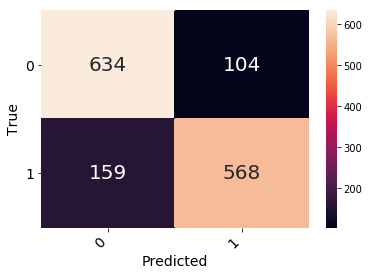

In [106]:
#Making prediction on the test data
pred_probs_test = learner_pca.predict_proba(df_test_pca)[:,1]
y_pred = model_pca.predict(df_test_pca)
imp_metrix(y_test,y_pred)

#### Plotting the ROC Curve

In [107]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_test,y_pred, drop_intermediate = False )

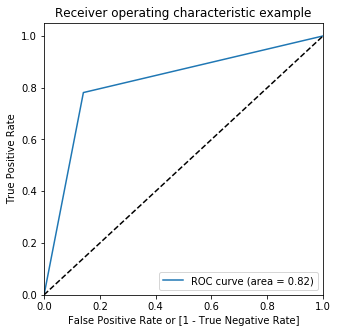

In [109]:
plot_roc(y_test,y_pred)

#### Finding Optimal Cutoff Point

In [110]:
y_pred_prob = pd.DataFrame(pred_probs_test)
#Changing column name of y_pred_prob

#print(y_pred_prob)
y_pred_prob["churn_prob"] = pd.DataFrame(pred_probs_test)

y_pred_prob = y_pred_prob.drop(columns=[0])
#print(y_pred_prob)
y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob],axis=1)
y_pred_final.rename(columns={0:'churn'}, inplace=True)
print(y_pred_final)

      churn    ID  churn_prob
0         1     0    0.259196
1         1     1    0.995127
2         0     2    0.071611
3         1     3    0.914282
4         1     4    1.000000
5         1     5    0.705832
6         0     6    0.104264
7         1     7    0.130074
8         1     8    0.669566
9         0     9    0.353533
...     ...   ...         ...
1455      0  1455    0.255553
1456      0  1456    0.735299
1457      1  1457    0.878486
1458      0  1458    0.296196
1459      0  1459    0.005205
1460      1  1460    0.131857
1461      1  1461    0.966421
1462      0  1462    0.485176
1463      0  1463    0.343852
1464      0  1464    0.119220

[1465 rows x 3 columns]


In [111]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,ID,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0.259196,1,1,1,0,0,0,0,0,0,0
1,1,1,0.995127,1,1,1,1,1,1,1,1,1,1
2,0,2,0.071611,1,0,0,0,0,0,0,0,0,0
3,1,3,0.914282,1,1,1,1,1,1,1,1,1,1
4,1,4,1.000000,1,1,1,1,1,1,1,1,1,1


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi,preci]
print(cutoff_df)

     prob  accuracy     speci     sensi     preci
0.0   0.0  0.496246  0.000000  1.000000  0.496246
0.1   0.1  0.664846  0.356369  0.977992  0.599494
0.2   0.2  0.746758  0.559621  0.936726  0.676938
0.3   0.3  0.799317  0.707317  0.892710  0.750289
0.4   0.4  0.814334  0.791328  0.837689  0.798165
0.5   0.5  0.820478  0.859079  0.781293  0.845238
0.6   0.6  0.804096  0.895664  0.711142  0.870370
0.7   0.7  0.789761  0.941734  0.635488  0.914851
0.8   0.8  0.763140  0.979675  0.543329  0.963415
0.9   0.9  0.716041  0.987805  0.440165  0.972644


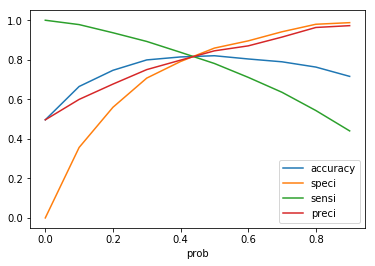

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi','preci'])

###### From the curve above 0.45 seems the optimum point to take it as a cutoff probability

In [160]:
y_pred_final['final_predicted'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

In [161]:
y_pred_final.head()

,churn,ID,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0,0.259196,1,1,1,0,0,0,0,0,0,0,0
1,1,1,0.995127,1,1,1,1,1,1,1,1,1,1,1
2,0,2,0.071611,1,0,0,0,0,0,0,0,0,0,0
3,1,3,0.914282,1,1,1,1,1,1,1,1,1,1,1
4,1,4,1.000000,1,1,1,1,1,1,1,1,1,1,1


Sensitivity:  0.781292984869326
Specificity:  0.8590785907859079
Precision:  0.8452380952380952
False Positive Rate:  0.14092140921409213
Positive predictive value:  0.8452380952380952
Negative predictive value:  0.7994955863808323
AUC Score:  0.820185787827617
F1 Score:  0.8120085775553968
Accuracy Score:  0.8204778156996587

Confusion Matrix


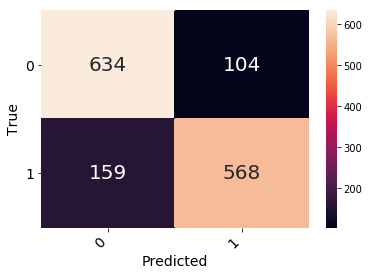

In [162]:
# Let's check the overall metrics again.
imp_metrix(y_pred_final.churn, y_pred_final.final_predicted)

### Creating a Decesion Tree Model

In [117]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier


In [163]:
decesion_tree = DecisionTreeClassifier(max_depth=5,class_weight="balanced")

In [164]:
decesion_tree.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [165]:
# Importing classification report and confusion matrix to check the evaluation matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [166]:
# Making predictions on test set data
y_pred = decesion_tree.predict(df_test_pca)

In [167]:
#Now let's check the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       738
           1       0.87      0.70      0.78       727

    accuracy                           0.80      1465
   macro avg       0.81      0.80      0.80      1465
weighted avg       0.81      0.80      0.80      1465



Sensitivity:  0.6987620357634112
Specificity:  0.9010840108401084
Precision:  0.8743545611015491
False Positive Rate:  0.0989159891598916
Positive predictive value:  0.8743545611015491
Negative predictive value:  0.752262443438914
AUC Score:  0.7999230233017598
F1 Score:  0.7767584097859328
Accuracy Score:  0.8006825938566553

Confusion Matrix


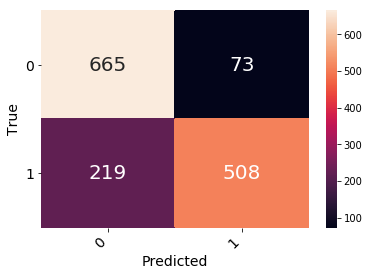

In [168]:
#Lets check the Sensitivity, Specificity & Accuracy from confusion matrix
imp_metrix(y_test,y_pred)

#### Let's plot the decision tree now from above data set

In [124]:
#Importing libraries   
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus, graphviz

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [125]:
# Putting features
X_train_df = pd.DataFrame(X_train)
features = list(X_train_df.columns[0:20])

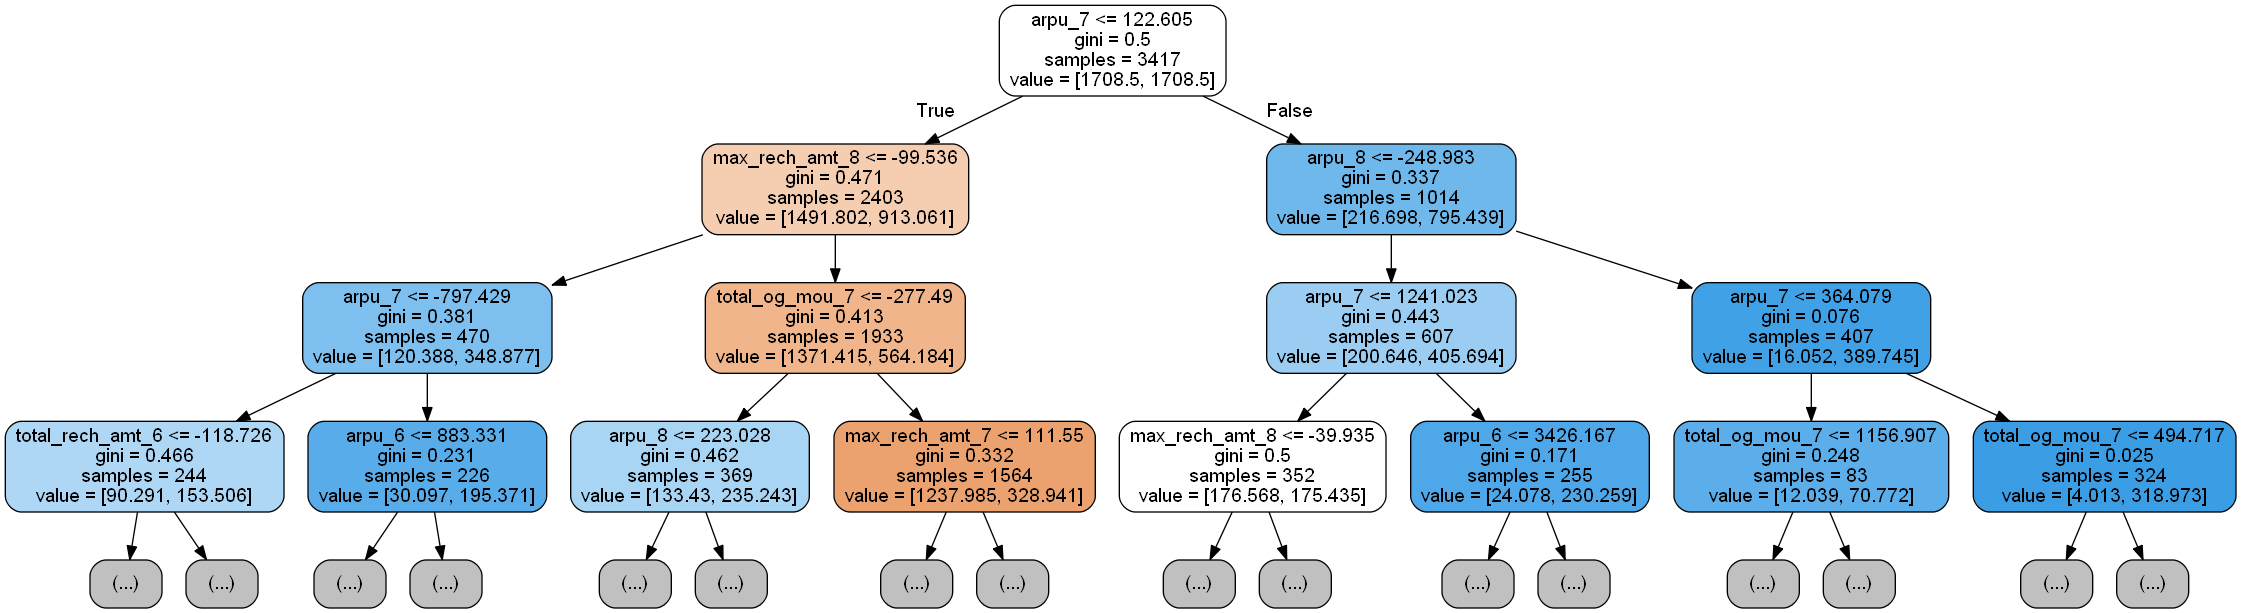

In [126]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(decesion_tree, out_file=dot_data,
                feature_names=features, filled=True,rounded=True,max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [128]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight="balanced",
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                    return_train_score=True,
                   scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [129]:
# scores of GridSearch CV
scores = tree.cv_results_

#print(scores)
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.021001,0.005657,0.003334,1.885819e-03,1,{'max_depth': 1},0.671053,0.664618,0.639719,0.658472,0.013510,19,0.668863,0.673398,0.651602,0.664621,0.009390
1,0.023668,0.001247,0.001333,4.714266e-04,2,{'max_depth': 2},0.717544,0.733977,0.724077,0.725198,0.006757,18,0.734300,0.736611,0.742870,0.737927,0.003620
2,0.035335,0.004643,0.001000,1.123916e-07,3,{'max_depth': 3},0.737719,0.760316,0.754833,0.750951,0.009626,17,0.760650,0.765584,0.787187,0.771140,0.011524
3,0.038336,0.006183,0.001000,1.123916e-07,4,{'max_depth': 4},0.764912,0.784899,0.755712,0.768510,0.012182,16,0.815108,0.797629,0.789820,0.800852,0.010572
4,0.039669,0.001700,0.001000,1.123916e-07,5,{'max_depth': 5},0.773684,0.803336,0.780316,0.785777,0.012708,6,0.845850,0.827041,0.828872,0.833921,0.008468


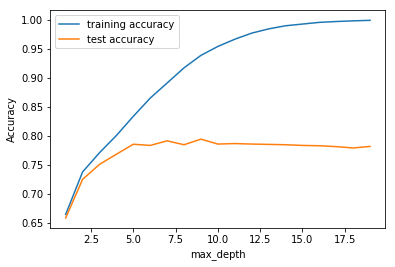

In [130]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [131]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "entropy", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [132]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.169610,0.008846,0.0010,1.168008e-07,5,{'min_samples_leaf': 5},0.773392,0.782164,0.763158,0.787701,0.787390,0.778753,0.009363,5,0.948042,0.945115,0.946945,0.947696,0.949909,0.947541,0.001557
1,0.162009,0.039036,0.0018,1.166294e-03,25,{'min_samples_leaf': 25},0.767544,0.773392,0.820175,0.806735,0.800587,0.793679,0.020081,1,0.862422,0.858031,0.853641,0.858815,0.852285,0.857039,0.003668
2,0.183610,0.038512,0.0010,6.325605e-04,45,{'min_samples_leaf': 45},0.766082,0.741228,0.817251,0.784773,0.804985,0.782850,0.027175,4,0.837907,0.833150,0.831687,0.835406,0.838757,0.835381,0.002698
3,0.105006,0.011984,0.0010,6.324851e-04,65,{'min_samples_leaf': 65},0.782164,0.760234,0.821637,0.771596,0.791789,0.785484,0.020928,3,0.832053,0.824003,0.817051,0.818581,0.816819,0.821701,0.005790
4,0.093605,0.004842,0.0010,6.324851e-04,85,{'min_samples_leaf': 85},0.798246,0.770468,0.804094,0.774524,0.788856,0.787240,0.013048,2,0.809733,0.814490,0.812294,0.813094,0.817550,0.813432,0.002576


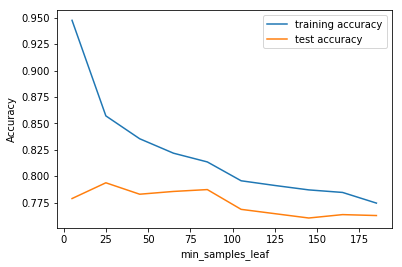

In [133]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split


The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [134]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                    return_train_score=True,
                   scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [135]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099606,0.010874,0.0010,9.536743e-08,5,{'min_samples_split': 5},0.773392,0.748538,0.782164,0.803807,0.784457,0.778461,0.017964,9,0.987559,0.983169,0.984632,0.988296,0.985375,0.985806,0.001886
1,0.095005,0.010827,0.0010,1.168008e-07,25,{'min_samples_split': 25},0.785088,0.760234,0.785088,0.787701,0.794721,0.782558,0.011711,6,0.922064,0.926454,0.919868,0.908193,0.914077,0.918131,0.006371
2,0.099606,0.016990,0.0010,1.168008e-07,45,{'min_samples_split': 45},0.790936,0.764620,0.790936,0.790630,0.784457,0.784314,0.010157,5,0.893889,0.889133,0.882547,0.883321,0.889580,0.887694,0.004234
3,0.096806,0.012513,0.0010,6.325605e-04,65,{'min_samples_split': 65},0.783626,0.752924,0.793860,0.797950,0.803519,0.786362,0.017949,3,0.871936,0.867545,0.860959,0.866862,0.866179,0.866696,0.003504
4,0.085605,0.008213,0.0018,1.600075e-03,85,{'min_samples_split': 85},0.785088,0.758772,0.808480,0.808199,0.797654,0.791630,0.018537,1,0.864984,0.852909,0.852909,0.860644,0.850457,0.856380,0.005502


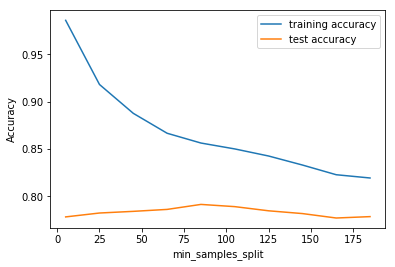

In [136]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [137]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [141]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099606,0.011147,0.0010,6.324851e-04,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.760234,0.744152,0.808480,0.781845,0.794721,0.777875,0.023178,7
1,0.092605,0.012274,0.0010,1.168008e-07,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.760234,0.744152,0.808480,0.781845,0.794721,0.777875,0.023178,7
2,0.079405,0.008381,0.0008,3.999949e-04,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.793860,0.747076,0.769006,0.758419,0.785924,0.770852,0.017206,15
3,0.075204,0.007574,0.0008,4.000664e-04,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.793860,0.747076,0.769006,0.758419,0.785924,0.770852,0.017206,15
4,0.136008,0.030128,0.0012,3.999949e-04,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.767544,0.771930,0.817251,0.795022,0.802053,0.790752,0.018666,3
5,0.116007,0.009445,0.0010,1.168008e-07,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.767544,0.771930,0.817251,0.795022,0.802053,0.790752,0.018666,3
6,0.085605,0.007658,0.0010,0.000000e+00,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.793860,0.764620,0.777778,0.758419,0.775660,0.774071,0.012186,11
7,0.087805,0.012656,0.0008,4.000187e-04,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.793860,0.764620,0.777778,0.758419,0.775660,0.774071,0.012186,11
8,0.064804,0.010797,0.0014,4.898819e-04,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.788012,0.758772,0.807018,0.771596,0.790323,0.783143,0.016573,6
9,0.047203,0.008134,0.0008,3.999949e-04,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.788012,0.758772,0.807018,0.771596,0.796188,0.784314,0.017233,5


In [142]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7928007023705005
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search.**

In [143]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [144]:
# accuracy score
clf_gini.score(df_test_pca,y_test)

0.7986348122866894

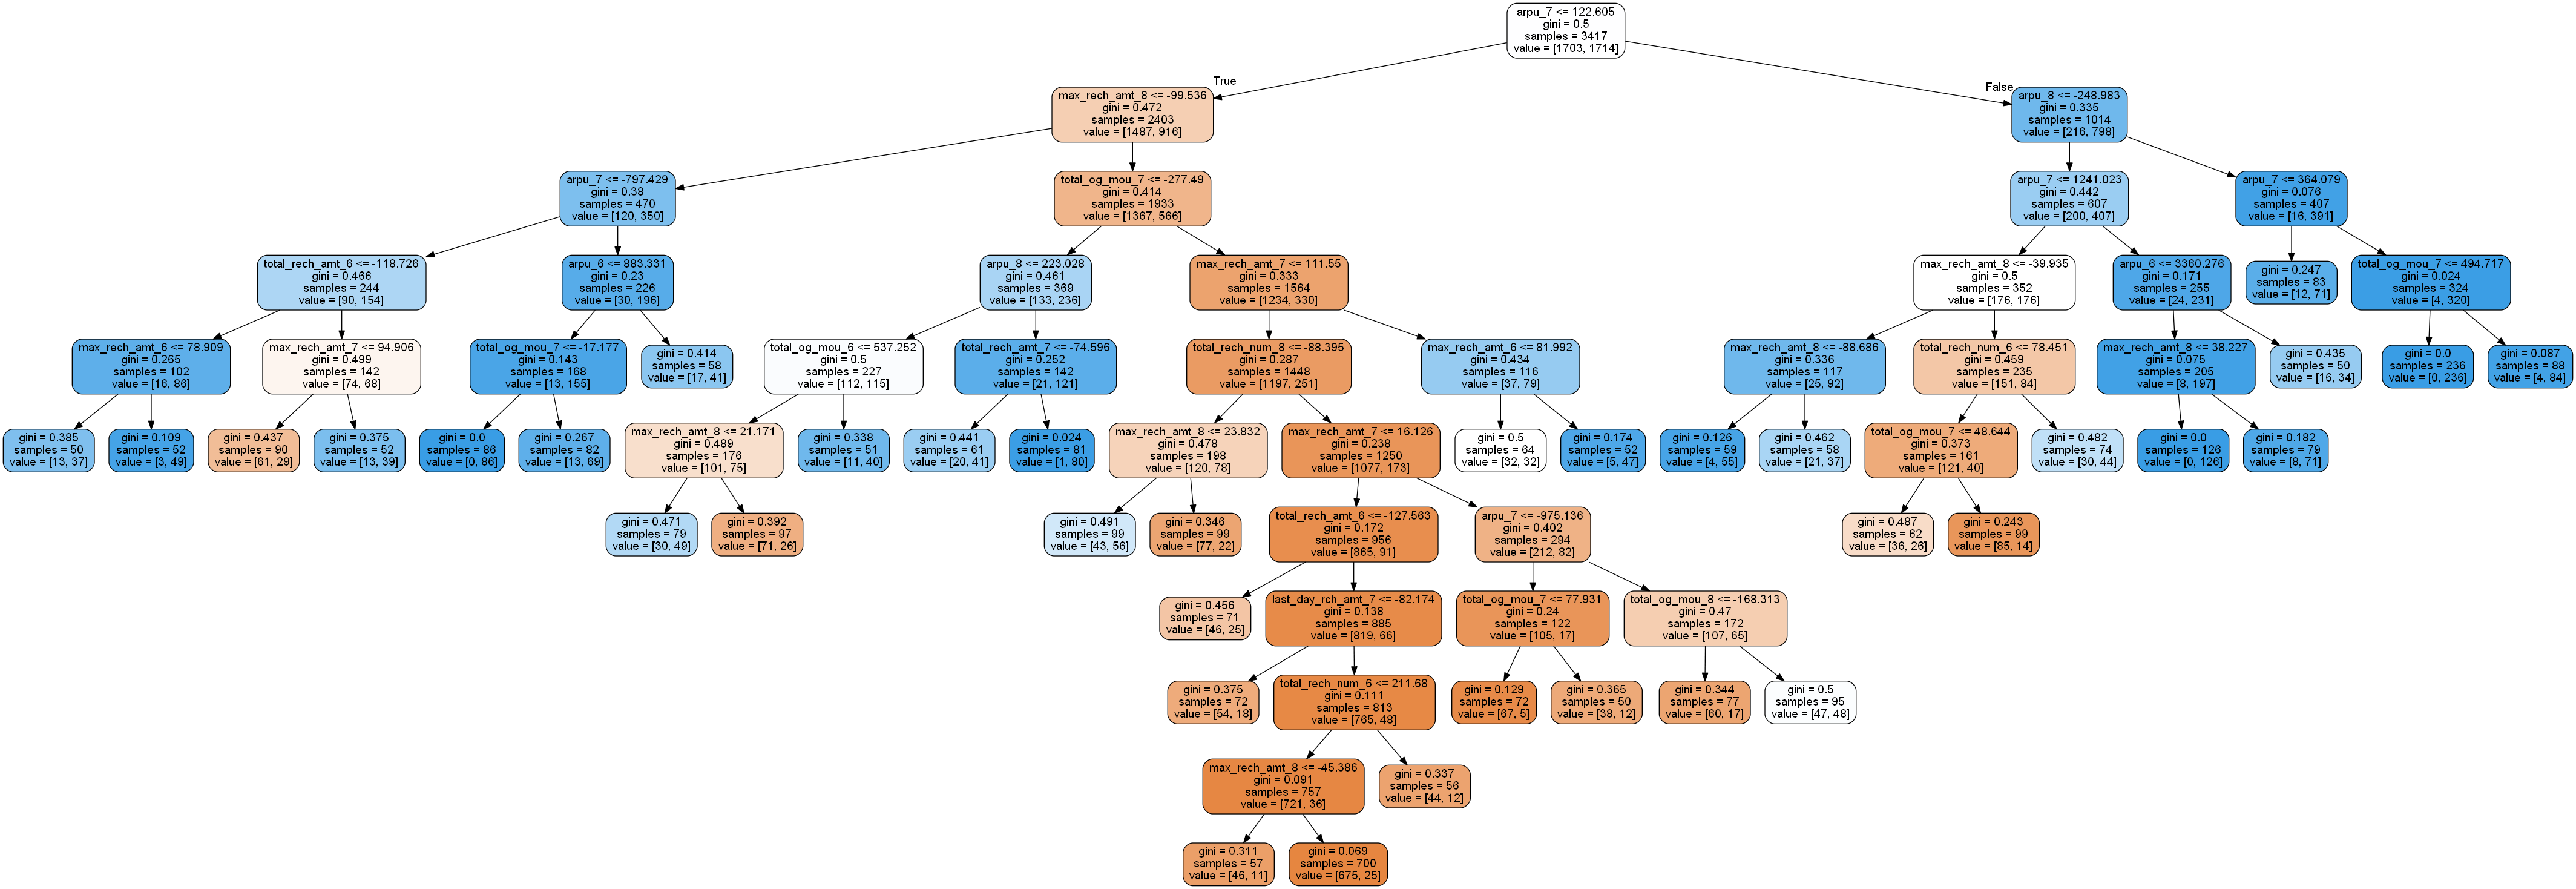

In [145]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [146]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = clf_gini.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       738
           1       0.80      0.80      0.80       727

    accuracy                           0.80      1465
   macro avg       0.80      0.80      0.80      1465
weighted avg       0.80      0.80      0.80      1465



Sensitivity:  0.7950481430536451
Specificity:  0.8021680216802168
Precision:  0.7983425414364641
False Positive Rate:  0.1978319783197832
Positive predictive value:  0.7983425414364641
Negative predictive value:  0.7989203778677463
AUC Score:  0.798608082366931
F1 Score:  0.7966919365954513
Accuracy Score:  0.7986348122866894

Confusion Matrix


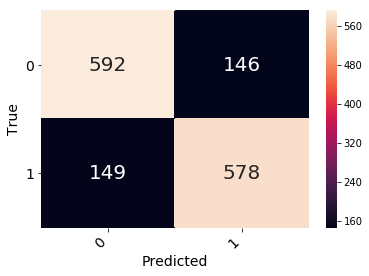

In [147]:
imp_metrix(y_test,y_pred)

##### Building random forest model

In [148]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameter and balanced subsample to tackle class imbalance.
rfc = RandomForestClassifier(max_depth=5,min_samples_leaf=50, min_samples_split=50)

In [149]:
rfc.fit(df_train_pca,y_train)

C:\Users\Varun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [150]:
# Let's check the report of our default model on training data
print(classification_report(y_train,rfc.predict(df_train_pca)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1703
           1       0.84      0.85      0.84      1714

    accuracy                           0.84      3417
   macro avg       0.84      0.84      0.84      3417
weighted avg       0.84      0.84      0.84      3417



In [151]:
# predict
y_train_pred = rfc.predict(df_train_pca)

Sensitivity:  0.8494749124854143
Specificity:  0.8367586611861421
Precision:  0.839677047289504
False Positive Rate:  0.1632413388138579
Positive predictive value:  0.839677047289504
Negative predictive value:  0.8467023172905526
AUC Score:  0.8431167868357782
F1 Score:  0.8445475638051043
Accuracy Score:  0.8431372549019608

Confusion Matrix


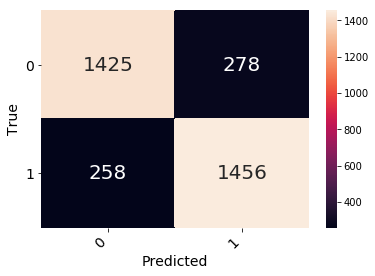

In [152]:
imp_metrix(y_train, y_train_pred)

##### From above two model : Logistic Regression , Decision Tree and Random Forest model we have got accuracy:
* Logistic Regression : 82.04%
* Decision Tree       : 79.86%
* Random Forest       : 84.31%

###### So we can say here Random Forest is better model than other two models.

In [153]:
# predictors
# feature_importance
importance = rfc.feature_importances_

# create dataframefeatures
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,arpu_7,25.415102
1,max_rech_amt_8,20.532835
2,total_og_mou_7,11.182554
3,max_rech_amt_7,9.445252
4,total_rech_amt_6,5.300204
5,total_ic_mou_7,5.228814
6,total_rech_num_7,3.374862
7,max_rech_amt_6,2.922274
8,total_og_mou_6,2.489436
9,arpu_6,2.397025


#### Therefore the Important Predictor variables to predict Churn as per their importance is as shown above

### Actionable Recommendations :-

###### From the above observation it is found that if a customer has less max_rech_amt in 6,7,8(Good Phase and Action Phase) month followed by the total_og_mou and total_ic_mou then he is likely  to churn , Also the average Revenue per user(arpu) of the Action Phase followed by Good Phase determines the probability of s user who is about to churn.Therefore for such customers special plans should be launched with less recharge amount focussing more on the voice calls that can be made in order to retain the customer.